In [1]:
import pandas as pd
from scipy.stats import chi2_contingency, chi2

In [2]:
campaign_data = pd.read_excel("C:/Users/FX505DT/Downloads/grocery_database.xlsx",sheet_name="campaign_data")

In [3]:
print(campaign_data)

     customer_id  campaign_name campaign_date mailer_type  signup_flag
0             74  delivery_club    2020-07-01     Mailer1            1
1            524  delivery_club    2020-07-01     Mailer1            1
2            607  delivery_club    2020-07-01     Mailer2            1
3            343  delivery_club    2020-07-01     Mailer1            0
4            322  delivery_club    2020-07-01     Mailer2            1
..           ...            ...           ...         ...          ...
865          372  delivery_club    2020-07-01     Mailer2            1
866          104  delivery_club    2020-07-01     Mailer1            1
867          393  delivery_club    2020-07-01     Mailer2            1
868          373  delivery_club    2020-07-01     Control            0
869          712  delivery_club    2020-07-01     Control            0

[870 rows x 5 columns]


In [4]:
campaign_data.head(50)

,customer_id,campaign_name,campaign_date,mailer_type,signup_flag
0,74,delivery_club,2020-07-01,Mailer1,1
1,524,delivery_club,2020-07-01,Mailer1,1
2,607,delivery_club,2020-07-01,Mailer2,1
3,343,delivery_club,2020-07-01,Mailer1,0
4,322,delivery_club,2020-07-01,Mailer2,1
5,115,delivery_club,2020-07-01,Mailer2,0
6,1,delivery_club,2020-07-01,Mailer2,1
7,120,delivery_club,2020-07-01,Mailer1,1
8,52,delivery_club,2020-07-01,Mailer1,1
9,405,delivery_club,2020-07-01,Mailer1,0


In [5]:
#pandas.dataframe.loc
campaign_data = campaign_data.loc[campaign_data['mailer_type']!='Control']

campaign_data.head(50)

,customer_id,campaign_name,campaign_date,mailer_type,signup_flag
0,74,delivery_club,2020-07-01,Mailer1,1
1,524,delivery_club,2020-07-01,Mailer1,1
2,607,delivery_club,2020-07-01,Mailer2,1
3,343,delivery_club,2020-07-01,Mailer1,0
4,322,delivery_club,2020-07-01,Mailer2,1
5,115,delivery_club,2020-07-01,Mailer2,0
6,1,delivery_club,2020-07-01,Mailer2,1
7,120,delivery_club,2020-07-01,Mailer1,1
8,52,delivery_club,2020-07-01,Mailer1,1
9,405,delivery_club,2020-07-01,Mailer1,0


In [6]:
#pandas.crosstab
observed_values = pd.crosstab(campaign_data["mailer_type"], campaign_data["signup_flag"])
print(observed_values)

signup_flag    0    1
mailer_type          
Mailer1      252  123
Mailer2      209  127


In [7]:
mailer1_signup_rate = 123/(252+123)
mailer2_signup_rate = 127/(209+127)

print(mailer1_signup_rate, mailer2_signup_rate)

0.328 0.37797619047619047


In [8]:
null_hypothesis = "There is no relationship between the mailer type and signhup flag"
alt_hypothesis = "There is a relationship between the mailer type and signhup flag"

acceptance_criteria = 0.05 #significance threeshold

In [9]:
help(chi2_contingency)

Help on function chi2_contingency in module scipy.stats.contingency:

chi2_contingency(observed, correction=True, lambda_=None)
    Chi-square test of independence of variables in a contingency table.
    
    This function computes the chi-square statistic and p-value for the
    hypothesis test of independence of the observed frequencies in the
    contingency table [1]_ `observed`.  The expected frequencies are computed
    based on the marginal sums under the assumption of independence; see
    `scipy.stats.contingency.expected_freq`.  The number of degrees of
    freedom is (expressed using numpy functions and attributes)::
    
        dof = observed.size - sum(observed.shape) + observed.ndim - 1
    
    
    Parameters
    ----------
    observed : array_like
        The contingency table. The table contains the observed frequencies
        (i.e. number of occurrences) in each category.  In the two-dimensional
        case, the table is often described as an "R x C table".
    

In [10]:
chi2_statistic, p_value, dof, expected_values = chi2_contingency(observed_values)

print(chi2_statistic, p_value)

1.728424144871394 0.1886122739808747


In [11]:
if p_value <= acceptance_criteria:
    print(f'Since out p-value of {p_value} is lower than our acceptance criterria of {acceptance_criteria}, we reject the null hypothesis and conclude that : {alt_hypothesis}')
else:
    print(f'Since out p-value of {p_value} is greater than our acceptance criterria of {acceptance_criteria}, we do not reject the null hypothesis and conclude that : {null_hypothesis}')
    
    

Since out p-value of 0.1886122739808747 is greater than our acceptance criterria of 0.05, we do not reject the null hypothesis and conclude that : There is no relationship between the mailer type and signhup flag


# 07-03-23

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder

In [4]:
# ISLR

Smarket=pd.read_csv("C:/Users/FX505DT/Downloads/Smarket.csv")
Smarket.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [5]:
Smarket.isna().any()

Year         False
Lag1         False
Lag2         False
Lag3         False
Lag4         False
Lag5         False
Volume       False
Today        False
Direction    False
dtype: bool

In [6]:
Smarket.shape

(1250, 9)

In [7]:
Smarket['Direction'].value_counts()

Up      648
Down    602
Name: Direction, dtype: int64

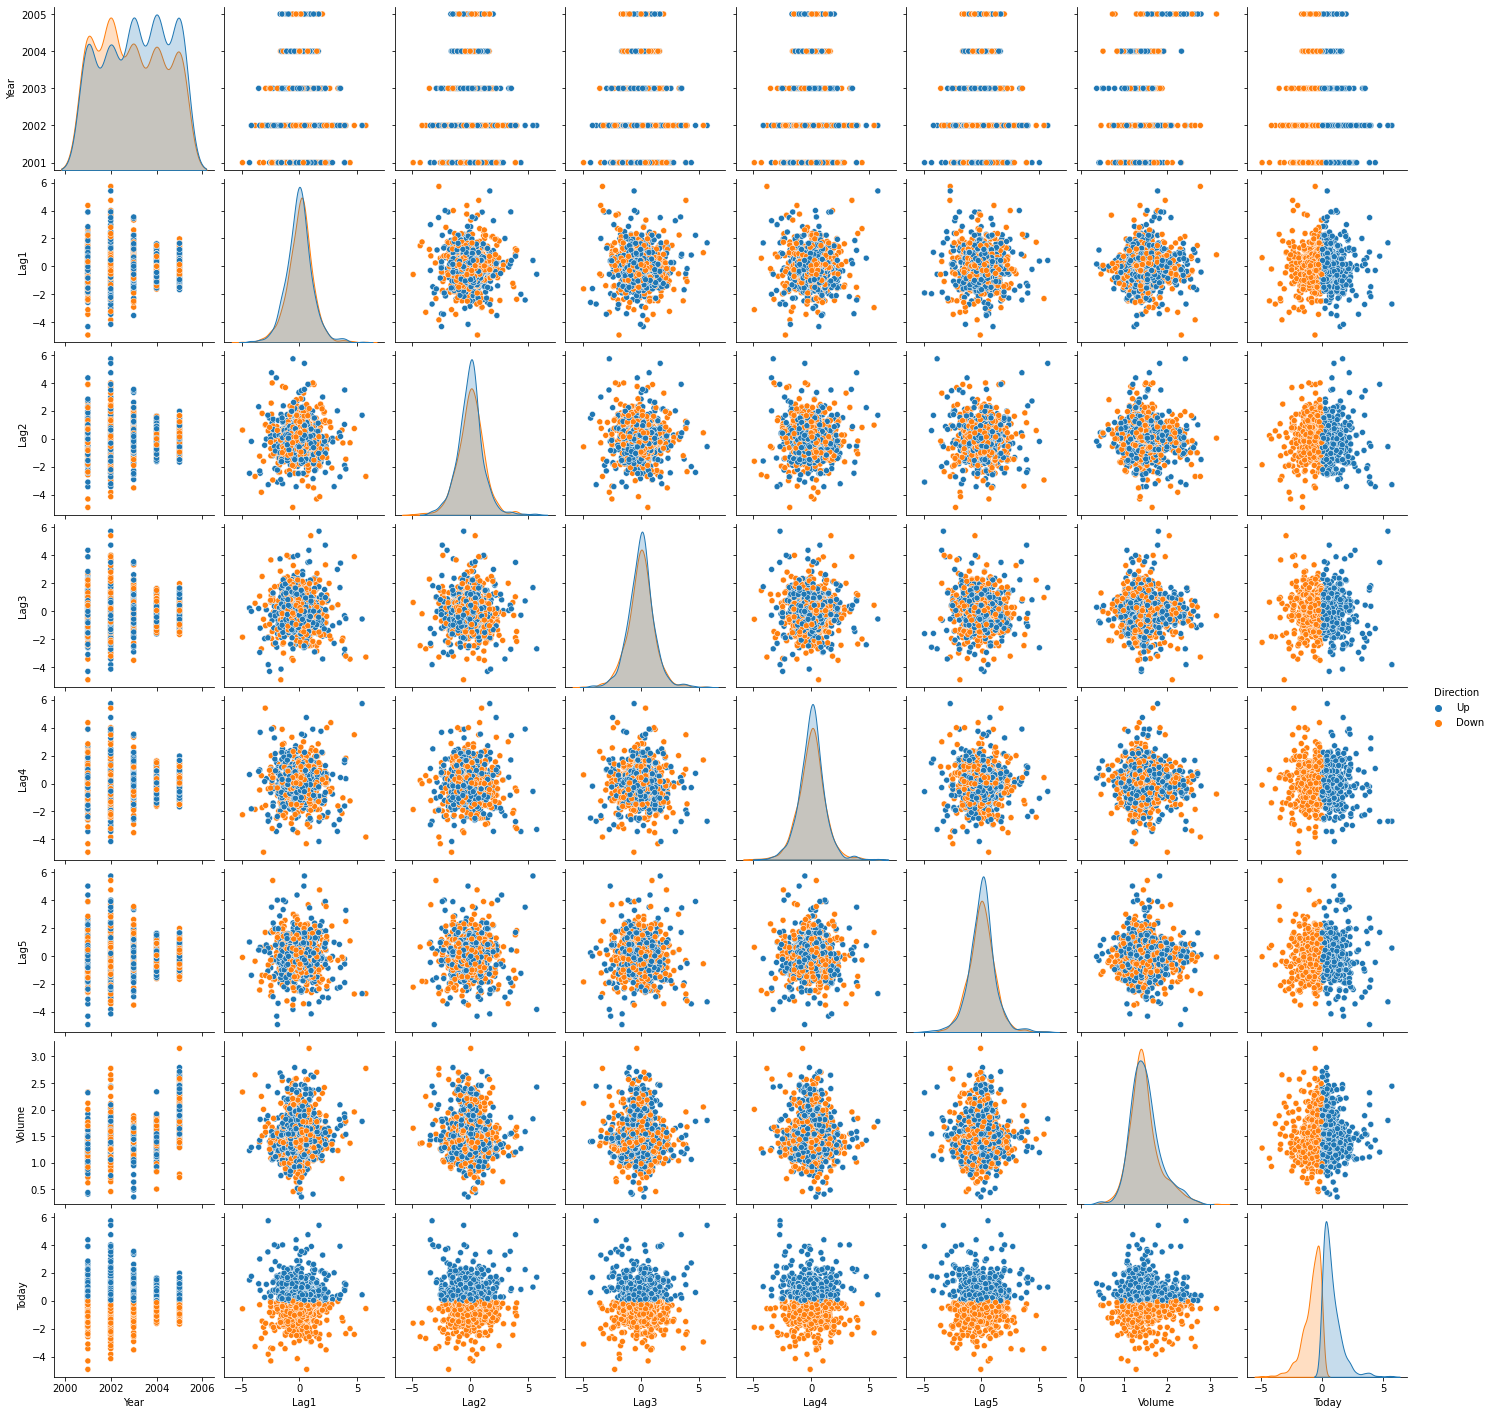

In [8]:
sns.pairplot(Smarket,hue="Direction")

In [9]:
Smarket.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


In [10]:
# Logistic Regression

X = Smarket.drop(columns=["Direction","Year","Today"])
y = Smarket["Direction"]

In [11]:
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

In [12]:
params = np.concatenate((log_reg.intercept_, log_reg.coef_.flatten()))
print(params)


[-0.12108463 -0.07284345 -0.04223481  0.0110163   0.00928427  0.01026372
  0.13211221]


In [13]:
pd.DataFrame(data={"Estimated Coefficients":params}, index=X.columns.insert(0,"intercept"))


,Estimated Coefficients
intercept,-0.121085
Lag1,-0.072843
Lag2,-0.042235
Lag3,0.011016
Lag4,0.009284
Lag5,0.010264
Volume,0.132112


In [14]:
# predict()
# predict_proba()

log_reg_probs = log_reg.predict_proba(X)
pd.DataFrame(log_reg_probs, columns=log_reg.classes_).head(10)



,Down,Up
0,0.492657,0.507343
1,0.518256,0.481744
2,0.518702,0.481298
3,0.484651,0.515349
4,0.489009,0.510991
5,0.492935,0.507065
6,0.507251,0.492749
7,0.490721,0.509279
8,0.482167,0.517833
9,0.510905,0.489095


In [15]:
log_reg_pred = log_reg.predict(X)
pd.DataFrame(confusion_matrix(y,log_reg_pred),columns=["PredDown","PredUp"], index=["ActualDown","ActualUp"])

,PredDown,PredUp
ActualDown,144,458
ActualUp,141,507


In [16]:
log_reg.score(X,y)


0.5208

In [17]:
train = (Smarket["Year"]<2005)

test = Smarket[~train]
test.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
998,2005,-0.134,0.008,-0.007,0.715,-0.431,0.7869,-0.812,Down
999,2005,-0.812,-0.134,0.008,-0.007,0.715,1.5108,-1.167,Down
1000,2005,-1.167,-0.812,-0.134,0.008,-0.007,1.7210,-0.363,Down
1001,2005,-0.363,-1.167,-0.812,-0.134,0.008,1.7389,0.351,Up
1002,2005,0.351,-0.363,-1.167,-0.812,-0.134,1.5691,-0.143,Down


In [18]:
X_train=Smarket.loc[train].drop(columns=["Direction","Year","Today"])
y_train=Smarket.loc[train,"Direction"]

X_test=Smarket[~train].drop(columns=["Direction","Year","Today"])
y_test=Smarket.loc[~train,"Direction"]

In [19]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [20]:
log_reg_pred = log_reg.predict(X_test)
pd.DataFrame(confusion_matrix(y_test,log_reg_pred),columns=["PredDown","PredUp"], index=["ActualDown","ActualUp"])

,PredDown,PredUp
ActualDown,74,37
ActualUp,93,48


In [21]:
log_reg.score(X_test, y_test)


0.48412698412698413

# 14-03-2023

In [39]:
X_train = Smarket.loc[train, ["Lag1", "Lag2"]]
y_train = Smarket.loc[train, "Direction"]

X_test = Smarket.loc[~train, ["Lag1", "Lag2"]]
y_test = Smarket.loc[~train, "Direction"]


In [40]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)
log_reg_score = log_reg.score(X_test, y_test)


In [41]:
lda_cl = LinearDiscriminantAnalysis()
lda_cl.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [42]:
pd.Series(lda_cl.priors_, index = lda_cl.classes_)

Down    0.491984
Up      0.508016
dtype: float64

In [43]:
pd.DataFrame(lda_cl.means_, index = lda_cl.classes_,columns = X_train.columns)

,Lag1,Lag2
Down,0.042790,0.033894
Up,-0.039546,-0.031325


In [44]:
lda_pred = lda_cl.predict(X_test)
lda_cl.score(X_test, y_test)

0.5595238095238095

In [45]:
qda_cl = QuadraticDiscriminantAnalysis()
qda_cl.fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

In [46]:
qda_pred = qda_cl.predict(X_test)
qda_cl.score(X_test, y_test)

0.5992063492063492

In [47]:
pd.DataFrame(confusion_matrix(y_test, qda_pred),
             columns=["PredDown","PredUp"], index=["ActualDown","ActualUp"])

,PredDown,PredUp
ActualDown,30,81
ActualUp,20,121
